## 4.1 손실함수
　신경망 학습은 현재의 상태를 하나의 지표로 표현하며, 해당 지표를 가장 좋게 만들어주는 매개변수 값을 탐색한다. 이러한 지표를 신경망에서는 **손실 함수**라고 한다.
　  
### 4.1.1 오차제곱합
　가장 많이 사용되는 손실 함수는 **오차제곱합**(sum of squared error; SSE)이며 식 (1)과 같다.  

\begin{equation}
E = \frac{1}{2}\sum_k (y_k - t_k)^2
\end{equation}  
  
여기서 $y_k$는 신경망으로 추정한 값(출력), $t_k$는 정답 레이블, $k$는 데이터의 차원 수를 나타낸다. 예를 들어, 앞서 MNIST 데이터셋에서 $y_k$는 신경망의 k번째 반복의 출력인 `y_prob`이며, $t_k$는 정답 레이블 `t[k]`가 된다.

In [1]:
y_prob = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t_k = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

　여기서 `y_prob`은 소프트맥스 함수의 출력값으로 각 카테고리에 대한 확률로 해석할 수 있으며, `t_k`는 정답을 가르키는 원소는 1로, 그 외는 0으로 표기하고 있으므로 정답은 2인 것을 알 수 있다. 참고로 `t_k`처럼 해당 원소만 1로 표기하고, 그 외는 0으로 나타내는 표기법을 **원-핫 인코딩**이라고 한다.  
  
　그럼 오차제곱합을 정의하고 두 가지 상황에서 오차제곱합을 구해보자.

In [2]:
import numpy as np

def SSE(y, t):
    y = np.array(y)
    t = np.array(t)
    return 1/2 * np.sum((y-t)**2)

# 정답이 2인 경우 가정
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# example1: 예측을 2로 했을 때
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(SSE(y, t))

# example1: 예측을 7로 했을 때
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(SSE(y, t))

0.09750000000000003
0.5975


　정답이 2인 상황에서 첫 번째 예는 신경망의 예측이 2를 가장 높은 확률로 추정한 경우이고 두 번째 예는 신경망의 예측이 7로 예측한 경우이다. 각각의 오차제곱합은 0.098, 0.598로 오차제곱합을 기준으로 했을 때, 첫 번째 경우를 정답에 더 가까울 것으로 판단할 수 있다. 
　  
### 4.1.2 교차 엔트로피 오차
　**교차 엔트로피 오차**(cross entrophy error; CEE)는 식 (2)와 같다.  

\begin{equation}
E = -\sum_k{t_k \log{y_k}}
\end{equation}  
  
　마찬가지로 $y_k$는 신경망으로 추정한 값(출력), $t_k$는 정답 레이블, $k$는 데이터의 차원 수를 나타내는데 여기서의 $t_k$는 정답에 해당하는 인덱스의 원소만 1이고 나머지는 0인 원-핫 인코딩 벡터이다. 따라서 식 (2)는 실질적으로 정답일 때의 추정인 $y_k$의 자연로그만 계산하는 식이 된다. 예를 들어, 정답 레이블이 '2'이고 이때의 신경망의 출력이 0.5면, 교차 엔트로피는 $-\log{0.5}=0.69$가 된다. 만약 이때 출력이 0.1이라면 교차 엔트로피 오차는 $-\log{0.1}=2.30$이다. 즉, 교차 엔트로피 오차는 정답일 때의 출력이 전체 값을 정한다.  
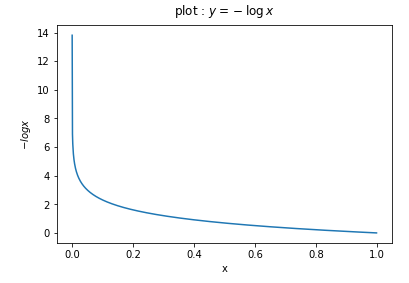  

　위 그림은 $y=-\log{x}$의 그래프인데, $x$를 정답 레이블에서의 신경망의 예측으로 대입해 생각해보면, 정답 레이블에 대한 예측 확률이 1에 가까울수록 교차 엔트로피 오차는 작아지고 반대로 정답 레이블에 대한 예측 확률이 0에 가까울수록 교차 엔트로피 오차는 증가한다.
  
　그럼 교차 엔트로피 오차를 구현해보자. 여기서 $y$가 0일 때 로그는 음의 무한대를 반환하기 때문에 아주 작은 값인 `delta`를 더해주었다. 또한, 위의 예와 동일한 두가지 예제도 함께 살펴보자.

In [3]:
def CEE(y, t):
    delta = 1e-10
    y = np.array(y)
    t = np.array(t)
    return -np.sum(t*np.log(y+delta))

# 정답이 2인 경우 가정
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# example1: 예측을 2로 했을 때
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(CEE(y, t))

# example1: 예측을 7로 했을 때
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(CEE(y, t))

0.510825623599324
2.302585091994046


　정답이 2인 상황에서 첫 번째 예는 신경망의 예측이 2를 가장 높은 확률로 추정한 경우이고 두 번째 예는 신경망의 예측이 7로 예측한 경우이다. 각각의 교차 엔트로피 오차는 0.511, 2.303으로 교차 엔트로피를 기준으로 했을 때, 첫 번째 경우를 정답에 더 가까울 것으로 판단할 수 있으며 이는 앞선 오차제곱합과 일치한다.  
　  
### 4.1.3 미니배치 학습
　구체적으로 기계학습은 훈련 데이터에 대한 손실 함수의 값을 구하고 이를 최소화하는 매개변수를 찾아낸다. 따라서, 모든 훈련 데이터에 대한 손실 함수 값이 필요하다. 지금까지는 하나에 데이터 포인트에 대한 손실 함수의 값만 구했으나, 이제 훈련 데이터 $N$개에 대한 손실 함수의 합을 구하는 방법을 생각해보자. 교차 엔트로피 오차는 식 (3)과 같이 구할 수 있을 것이다.  

\begin{equation}
CEE = -\frac{1}{N}\sum_n\sum_k{t_{nk}\log{y_{nk}}}
\end{equation}  
  
여기서 $t_{nk}$는 $n$번째 데이터의 $k$번째 클래스에 대한 값이고, $y_{nk}$는 $n$번째 데이터의 정답 레이블이다. 식 (3)은 단지 식 (2)를 $N$개의 데이터로 확장하고 $N$으로 나누어 **평균 손실 함수**를 구하는 것이다.  
  
　그런데, MNIST의 훈련 데이터는 60,000개이기 때문에 모든 데이터를 사용해 한 번에 손실 함수를 구하면 시간이 오래 걸릴 수 있다. 이런 경우 데이터의 일부를 추출해 전체에 대한 '근사치'로 이용할 수 있다. 이처럼 신경망 학습에서 훈련 데이터의 일부만 골라서 학습을 수행하는 것을 **미니배치(mini-batch)**라고 한다. 예를 들면 60,000장의 이미지에서 100장만을 무작위로 뽑아 신경망 학습을 진행할 수 있는데 이러한 경우를 **미니배치 학습**이라고 한다.  
  
　그럼 미니배치 학습을 구현해보기 위해 MNIST 데이터를 불러오자.

In [4]:
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)  # 원-핫 인코딩 수행한 정답 레이블

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


　60,000개의 데이터에서 무작위로 10장을 추출하기 위해 `np.random.choice()` 함수를 사용하자. `np.random.choice()`는 지정한 범위에서 무작위로 원하는 개수를 추출한다. 예를 들어, `np.random.choice(1000, 5)`는 1000미만의 수에서 무작위로 5개의 수를 추출한다.

In [5]:
# np.random.choice example
print('1000미만의 수에서 무작위 5개 반복추출:', np.random.choice(1000, 5))

train_size = x_train.shape[0]
batch_size = 100
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

1000미만의 수에서 무작위 5개 반복추출: [932 535 967 194 560]


In [6]:
t_train[1].shape

(10,)

In [7]:
t_train[1].reshape(1,t_train[1].size).shape

(1, 10)

### 4.1.4 (배치용) 교차 엔트로피 오차 구하기
　미니배치와 같이 배치 데이터를 반영한 교차 엔트로피는 다음과 같이 구현할 수 있다. 코드를 살펴보자. `y`는 신경망의 출력이고 `t`는 정답 레이블인데, 만약 `y`가 1차원이면 데이터 하나에 대해 교차 엔트로피 오차를 구하는 경우이므로 추후 배치 사이즈(`batch_size`)를 1로 계산하기 위해 `reshape`함수로 데이터의 shape을 바꿔준다. 그 후 이미지 1장단 평균의 교차 엔트로피 오차를 계산한다.

In [8]:
def CEE(y, t):
    # y: 신경망의 출력, t: 정답 레이블
    # 한 개 샘플인 경우
    if y.ndim == 1:
        t = t.reshape(1, -1)
        y = y.reshape(1, -1)
        
    batch_size = y.shape[0]   # 예측의 데이터 개수 = 배치 사이즈
    return -np.sum(t*np.log(y + 1e-10)) / batch_size

# 정답 레이블이 원-핫 인코딩인 경우
t = np.array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
             [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])
y = np.array([[0.08, 0.06, 0.04, 0.6, 0.05, 0.01, 0.01, 0.03, 0.07, 0.05],
              [0.08, 0.6, 0.04, 0.06, 0.05, 0.01, 0.01, 0.03, 0.07, 0.05]])

CEE(y, t)

0.510825623599324

　만약 정답 레이블이 원-핫 인코딩이 아니라 숫자 레이블(1이나 2 등)로 주어진 경우에는 다음과 같이 교차 엔트로피를 구현할 수 있다.

In [9]:
def CEE(y, t):
    if y.ndim == 1:
        t = t.reshape(1, -1)
        y = y.reshape(1, -1)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-10)) / batch_size

# 정답 레이블이 원-핫 인코딩이 아닌 경우
t = np.array([3, 1])
y = np.array([[0.08, 0.06, 0.04, 0.6, 0.05, 0.01, 0.01, 0.03, 0.07, 0.05],
              [0.08, 0.6, 0.04, 0.06, 0.05, 0.01, 0.01, 0.03, 0.07, 0.05]])
CEE(y, t)

0.510825623599324

　여기서 핵심은 원-핫 인코딩일 때 정답이 아닌 위치 즉, $t$가 0인 원소는 교차 엔트로피도 0이기에 무시해도 된다는 것이다. 참고로 `y[np.arange(batch_size), t]`에 대해 위 예시와 함께 살펴보자. 먼저 `np.arnage(batch_size)`는 0부터 배치 사이즈-1까지의 넘파이 배열을 생성한다. 즉, 배치 사이즈가 2라면, `np.arange(2)`는 `array([0, 1])`과 같다. 또한, 위 예에서 정답은 [3, 1]과 같은 형태로 주어져 있다. 따라서 `y[np.arange(batch_size), t]`는 `y[0, 3]`, `y[1, 1]`인 넘파이 배열을 생성하게 된다.  
　  
  
## 4.2 수치 미분
　경사법에서는 기울기(gradient) 값을 기준으로 나아갈 방향을 정한다. 간단하게 미분을 복습해보자.  
　  
### 4.2.1 미분
　미분은 '특정 순간'의 변화량을 뜻한다. 수식으로는 다음과 같다.  

\begin{equation}
{df(x) \over dx} = \lim_{h \to 0}\frac{f(x+h)-f(x)}{h}
\end{equation}  
  
즉, 미분은 $x$의 작은 변화가 함수 $f(x)$를 얼마나 변화시키느냐를 의미한다. 이를 구현해보자.

In [10]:
# 나쁜 구현의 예
def numerical_diff(f, x):
    h = 10e-50
    return (f(x+h) - f(x)) / h

　위 함수 식 (4)를 그대로 구현한 함수인데, 두 가지 문제점이 있다. 먼저 첫 번째는 $h$에 대한 것이다. $h$에 `10e-50`이라는 매우매우 작은 수를 대입하는 방식을 취했는데, 이러한 방식은 **반올림 오차(rounding error)** 문제를 일으킨다. 반올림 오차 문제란 소숫점 아래가 생략 되면서 최종 계산 결과에 발생하는 오차를 말한다. 반올림 오차의 대표적인 예를 살펴보자.

In [11]:
np.float32(1e-50)

0.0

　이처럼 `1e-50`을 32비트 부동소수점으로 나타내면 0.0이 되어 올바르게 표현할 수 없다. 따라서 좋은 결과를 얻는다고 알려져 있는 $10^{-4}$로 대체하자.  
  
　두 번째는 함수 `f`의 차분과 관련된 것으로 `f(x+h) - f(x)`라는 계산에는 오차가 포함되어 있다는 사실에 주의해야 한다. 아래 그림을 보자.  
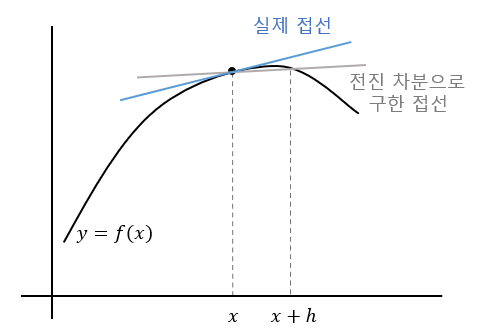
   
실제 접선은 하늘색이지만, 위 구현에서의 미분은 회색에 해당한다. 이는 $h$가 무한히 0으로 다가가는 것이 불가능하기 때문에 발생하는 오차이다. 위의 구현과 같이 근차치로 미분을 계산하는 것을 **수치 미분(numerical differentiation)**이라고 하며 오차가 포함된다. 이러한 오차를 줄이기 위해 **중앙 차분(centered-difference)**을 계산하는 방법을 사용하자.  
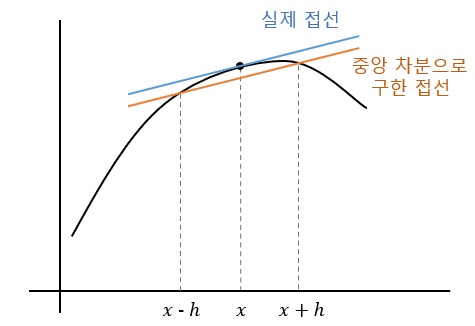  
  
　두 가지 문제점을 개선한 미분의 구현은 다음과 같다.

In [12]:
def numerical_diff(f, x):
    h = 1e-4  # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

### 4.2.2 수치 미분의 예
앞에서 구현한 수치 미분을 이용해 식 (5)의 함수를 $x=2$와 $x=5$에서 미분해보고, 접선을 구해보자.  

\begin{equation}
y = 0.2x^2 + 0.8x
\end{equation} 

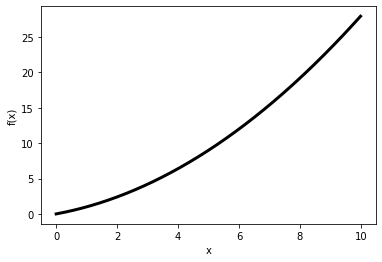

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def function1(x):
    return 0.2*x**2 + 0.8*x

# 데이터 생성
x = np.arange(0.0, 10.0, 0.01)
y = function1(x)

# plot
plt.plot(x, y, color='black', linewidth=3)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [14]:
print(numerical_diff(function1, 2))
print(numerical_diff(function1, 5))

1.6000000000016001
2.80000000000058


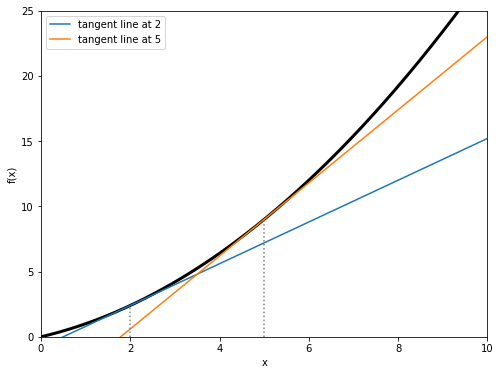

In [15]:
def tangent(f, t):
    slope = numerical_diff(f=f, x=t)
    bias = f(t) - t*slope
    return slope*x + bias
    
x = np.arange(0.0, 10.0, 0.01)
y = function1(x)
tangent_2 = tangent(function1, t=2)
tangent_5 = tangent(function1, t=5)


# plot
plt.figure(figsize=(8,6))
plt.plot(x, y, color='black', linewidth=3)
plt.plot(x, tangent_2, label='tangent line at 2')
plt.plot(x, tangent_5, label='tangent line at 5')
plt.ylim(0, 25); plt.xlim(0,10)
plt.xlabel('x')
plt.ylabel('f(x)')

## optional
op1 = np.arange(0, function1(2), 0.01)
op1_x = np.repeat(2.0, len(op1))
op2 = np.arange(0, function1(5), 0.01)
op2_x = np.repeat(5.0, len(op2))

plt.plot(op1_x, op1, color='grey', linestyle=':')
plt.plot(op2_x, op2, color='grey', linestyle=':')
plt.legend()
plt.show()

### 4.2.3 편미분
　식 (6)을 보면 앞선 예들과는 달리 변수가 2개라는 특징이 있다.  

\begin{equation}
f(x_0, x_1) = x_0^2 + x_1^2
\end{equation}  
  
　인수 $x$를 넘파이 배열이라고 가정한 뒤, 이 함수를 구현하면 다음과 같다.

In [16]:
def function2(x):
    return x[0]**2 + x[1]**2

　식 (7)을 미분하기 위해서는 변수가 2개라는 점을 주의해야 한다. 즉, $x_0$에 대한 미분인지, $x_1$에 대한 미분인지 구별해야 하며, 이처럼 여러 변수를 갖는 함수에 대한 미분을 **편미분(partial differential)**이라고 한다. 그럼 다음과 같은 두 가지 문제를 풀어보자.  
  
- 문제 1: $x_0=3$, $x_1=4$일 때, $x_0$에 대한 편미분 $\frac{\partial f}{\partial x_0}$를 구하라.
- 문제 2: $x_0=3$, $x_1=4$일 때, $x_1$에 대한 편미분 $\frac{\partial f}{\partial x_0}$를 구하라.

In [17]:
def function_tmp1(x0):
    return x0**2 + 4**2

print(numerical_diff(function_tmp1, 3))

def function_tmp2(x1):
    return 3**2 + x1**2

print(numerical_diff(function_tmp2, 4))

6.00000000000378
7.999999999999119


　두 문제의 해결은 두 변수 중 하나를 고정한 상태로 함수를 정의한 뒤에 그 함수를 미분하는 방식으로 해결했다. 이처럼 편미분은 다른 변수들의 값을 고정하고 해당 변수가 변화할 때 함수의 변화량을 구한다.

## 4.3 기울기(gradient)
앞에서는 편미분을 변수 별로 각각 계산했지만, 만약 동시에 계산하는 경우를 생각해보자. 예를 들어 앞 문제를 합쳐서 $x_0=3$, $x_1=4$일 때, $(\frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1}$)를 구하고자 한다. 이처럼 $(\frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1}$)와 같이 모든 변수의 편미분을 벡터로 정리한 것을 **기울기(gradient)**라고 한다.

In [18]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)   # x와 shape가 동일한 배열 생성
    
    for i in range(x.size):
        tmp = x[i]
        x[i] = tmp + h
        f_xh1 = f(x)
        
        x[i] = tmp - h
        f_xh2 = f(x)
        # f_xh1, f_xh2를 구할 때 다른 변수는 변화가 없이 고정되어 있음
        
        grad[i] = (f_xh1 - f_xh2) / (2*h)
        x[i] = tmp
        
    return grad

numerical_gradient(function2, np.array([3.0, 4.0]))

array([6., 8.])

　기울기의 의미를 생각해보자. 아래 그림은 기울기 결과에 마이너스를 붙인 벡터를 그린 것인데, 기울기는 각 지점에서 낮아지는 방향을 가르킨다. 즉, **기울기가 가르키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향**이다.  
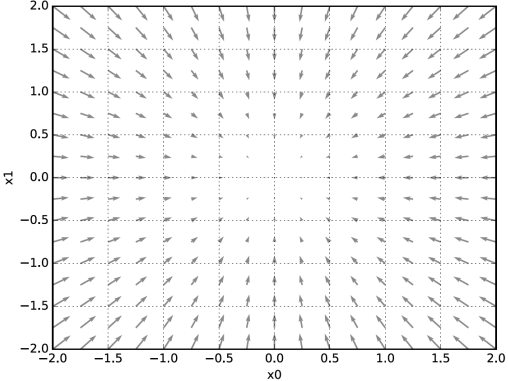  
　  
   
###  4.3.1 경사법(gradient method)
　신경망 학습의 목적은 손실 함수를 최소로 만드는 최적의 매개변수를 찾는 것이다. 이를 달성하기 위한 방법 중 기울기를 활용해 찾는 것이 경사법이다. 여기서 주의할 점은 기울기가 가르키는 곳이 극솟값일 수도 고, 안장점일 수도 있다는 것이다. 즉, 기울기가 0인 장소를 찾았어도 그것이 반드시 최솟값이라고 보장할 수는 없다. 하지만, 기울기 정보를 단서로 나아갈 방향을 정하고 나아가야 함수의 값을 줄일 수 있다.  
  
　**경사법은 현 위치에서 기울어진 방향으로 일정 거리만큼 이동하며 함수의 값을 점차적으로 줄여나가는 방법**이다. 최솟값을 찾는 경우 경사 하강법(gradient descent method), 최댓값을 찾는 경우 경사 상승법(gradient ascent method)라고 하나 손실 함수의 부호를 반전시키면 동일한 문제이다. 그럼 경사법을 수식으로 살펴보자.  
  
\begin{equation}
x_0 = x_0 - \eta \frac{\partial f}{\partial x_0} \\
x_1 = x_1 - \eta \frac{\partial f}{\partial x_1}
\end{equation}  
  
식 (7)의 $\eta$는 **학습률(learning rate)**이라 부르며 한 번의 학습으로 얼마만큼 학습할지, 즉, 매개변수 값을 얼마나 갱신할지 정한다. 학습률 $\eta$값은 0.01이나 0.001 등 미리 지정해야 하는데, 일반적으로 이 값이 너무 크거나 작으면 좋지 않다. 또한, 식 (7)은 1회에 해당하는 갱신이며 이를 여러 번 반복하면서 서서히 함수의 값을 줄여나간다.

In [19]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
        
    return x

경사하강법을 구현한 위 코드에서 `f`는 최적화하고자 하는 함수, `init_x`는 입력의 초기값, `lr`은 학습률, 그리고 `step_num`은 경사법에 따른 반복 횟수를 의미한다.  
  
　초깃값을 [-3.0, 4.0]으로 하여 경사법을 이용해 식 (6)을 최솟값을 구해보자.

In [20]:
# 경사법으로 식(6)의 최솟값 구하기
init_x = np.array([-3.0, 4.0])
gradient_descent(f=function2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

경사법을 사용한 갱신 과정 그래프는 아래와 같다. 최솟값을 나타내는 원점에 점차 가까워지는 것을 확인할 수 있다.  
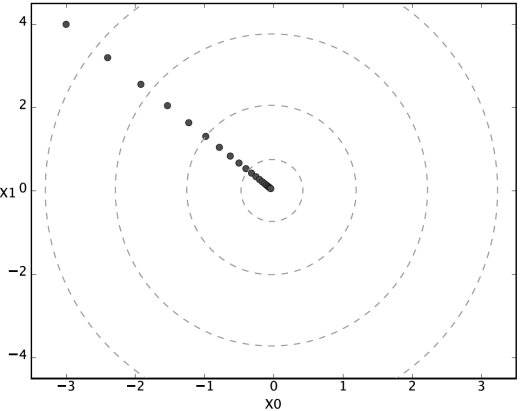  
  
만약 학습률이 너무 높거나 낮다면 어떻게 될까? 너무 큰 경우는 발산, 너무 작은 경우는 거의 갱신되지 않은 채 끝나버린다.

In [21]:
# 학습률이 너무 큰 경우
init_x = np.array([-3.0, 4.0])
print(gradient_descent(f=function2, init_x=init_x, lr=10.0, step_num=100))

# 학습률이 너무 작은 경우
init_x = np.array([-3.0, 4.0])
print(gradient_descent(f=function2, init_x=init_x, lr=1e-10, step_num=100))

[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


### 4.3.2 신경망에서의 기울기
　신경망 학습에서도 기울기를 구해야 한다. 이때의 기울기는 가중치 매개변수에 대한 손실 함수의 기울기를 말한다. 예를 들어, 입력이 2개이고 출력이 3개, 손실 함수는 $L$인 신경망을 생각해보자. 그럼 가중치는 $2\times 3$의 shape를 갖는 $W$로, 이때의 경사는 $\frac{\partial L}{\partial W}$로 나타낼 수 있으며 수식으로는 다음과 같다.  
  
\begin{equation}
W = \begin{pmatrix} w_{11} & w_{12} & w_{13} \\ w_{21} & w_{22} & w_{23} \end{pmatrix} \\
\frac{\partial L}{\partial W} = \begin{pmatrix} \frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial w_{12}} & \frac{\partial L}{\partial w_{13}} \\ \frac{\partial L}{\partial w_{21}} & \frac{\partial L}{\partial w_{22}} & \frac{\partial L}{\partial w_{23}} \end{pmatrix}
\end{equation}  
  
$\frac{\partial L}{\partial W}$의 각 원소는 각 원소에 대한 편미분이다. 예를 들어, $\frac{\partial L}{\partial w_{11}}$은 $w_{11}$을 조금 변경했을 때 손실 함수 $L$이 얼마나 변화하는지를 나타낸다.  
  
　간단한 신경망으로 실제로 기울기를 구하는 코드를 구현해보자. `simpleNet`클래스는 입력층의 2개의 노드, 출력층에 3개의 노드, 그리고 소프트맥스 활성화 함수를 갖는 신경망을 구현한다. $2\times3$ 가중치 매개변수 하나를 인스턴스 변수로 갖고, 예측을 수행하는 `predict()`과 손실 함수로 교차 엔트로피 오차의 값을 계산하는 `loss()` 두 개의 메서드를 갖는다.

In [22]:
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)  # 정규분포로 초기화 (2x3 shape)
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [23]:
net = simpleNet()
print(net.W)

[[ 0.53042147 -0.87903143 -0.22111551]
 [-1.54042337 -0.26633108  1.69168026]]


In [24]:
x = np.array([0.6, 0.9])
pred = net.predict(x)
print(pred)

np.argmax(pred)   # 최댓값의 인덱스

[-1.06812815 -0.76711683  1.38984293]


2

In [25]:
t = np.array([0, 0, 1])   # 정답 레이블
net.loss(x, t)  # 교차 엔트로피 오차

0.18339147977949602

이제 기울기를 구하기 위해 `f(W)`를 정의하고 결과를 살펴보자. `f(W)`를 정의하는 이유는 `numerical_gradient(f, x)` 내부에서 실행하는 `f(x)`와의 일관성 때문이다.

In [26]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
dW

array([[ 0.04275845,  0.05777627, -0.10053472],
       [ 0.06413768,  0.08666441, -0.15080209]])

`dW`는 `numerical_gradient(f, net.W)`의 결과로 $\frac{\partial L}{\partial W}$에 대응된다. 이 예에서 $\frac{\partial L}{\partial w_{11}}$의 값은 대략 0.04인데 이는 $w_{11}$을 $h$만큼 늘리면 손실 함수의 값은 $0.04h$만큼 증가한다는 의미다. 마찬가지로 $\frac{\partial L}{\partial w_{13}}$은 -0.10이기 때문에, 만약 $w_{13}$을 $h$만큼 늘린다면, 손실 함수는 $0.10h$만큼 감소한다. 그래서 손실 함수를 줄여야하는 목적을 달성하기 위해서는 $w_{11}$은 음의 방향으로, $w_{13}$은 양의 방향으로 갱신해야 한다. 그리고, 한 번 갱신할 때 $w_{13}$이 $w_{11}$보다 크게 기여한다는 사실도 알 수 있다.  
　  
## 4.4 학습 알고리즘 구현하기  
지금까지 공부한 신경망 학습의 절차는 다음과 같다.
- 신경망에는 가중치와 편향이 있는데 이를 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이라고 한다. 학습은 다음의 절차로 이루어진다.
1. 미니배치: 훈련 데이터 일부를 추출
2. 기울기 산출: 미니배치의 손실 함수 값을 줄이기 위해 기울기 계산
3. 매개변수 갱신: 기울기 방향으로 조금 갱신
4. 반복(1 \~ 3)  
  
이는 경사 하강법으로 매개변수를 갱신하는 방법이며 미니배치로 데이터를 무작위 선정하기 때문에 **확률적 경사 하강법(stochastic gradient descent; SGD)**라고 한다.  
　  
### 4.4.1 2층 신경망 클래스 구현하기
MNIST 데이터셋에 대해 2층 신경망(은닉층 1개)으로 학습해보자. 아래에 구현한 TwoLayerNet 클래스는 2층 신경망을 구현한 것으로 신경망의 매개변수를 보관하는 `params`와 기울기를 보관하는 `grads` 두 개의 인스턴스 변수(딕셔너리형)를 갖는다. 

In [30]:
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
    
    # 예측 수행 함수
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    # 손실 함수 계산 함수(교차 엔트로피 오차)
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    # 정확도 계산 함수
    def accuracy(self, x, t):
        y_probs = self.predict(x)
        y = np.argmax(y_probs, axis=1)
        t = np.argmax(t, axis=1)
        
        accruacy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    # 기울기 산출 함수(수치 미분 방식)
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)   # def loss_W(W): \ return self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

　TwoLayerNet의 메서드를 살펴보면, 우선 `__init__` 메서드는 클래스를 초기화 한다. 인수는 순서대로 입력 층의 뉴런 수, 은닉층의 뉴런 수, 출력층의 뉴런 수를 의미한다. 예를 들어 MNIST 이미지를 flatten하여 불러오면 $28\times28$, 출력은 0부터 9까지 10개이므로 `input_size=784, output_size=10`이 된다. 이때 은닉층의 뉴런 수는 적당한 값을 설정한다. 이때 초기화 메서드 부분은 클래스를 이용해 객체를 생성할 때 수행되며 매개변수도 초기화하는데, 때로는 매개변수의 초깃값이 신경망 학습의 성패를 좌우한다. 이는 추후에 살펴볼 내용이므로 현재는 기울기는 단순히 정규분포에서 난수로, 편향은 0으로 초기화한다. 나머지 메서드들의 구현은 앞과 비슷하다.  
　  
### 4.4.2 미니배치 학습 구현하기
훈련 데이터에서 일부를 무작위 추출한 뒤, 이에 대해 경사법으로 매개변수를 갱신하는 **미니배치 학습**을 구현해보자.

In [35]:
from dataset.mnist import load_mnist
from tqdm import tqdm

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

# hyper-parameters
iter_num = 10000   # 반복횟수
train_size = x_train.shape[0]
batch_size = 100  # 미니배치 크기
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

train_loss_list = []

for i in tqdm(range(iter_num)):
    # 미니배치 추출
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산 - 수치 미분(시간이 매우 오래 걸림)
    grad = network.numerical_gradient(x_batch, t_batch)
    
    # 매개변수 업데이트
    for key in ('W1','b1','W2','b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [15:26<00:00,  9.26s/it]


　여기에서는 미니배치 크기를 10으로 주었기 때문에 반복마다 60,000개의 훈련 데이터에서 임의로 100개를 추출한 뒤 이를 대상으로 확률적 경사 하강법을 수행해 매개변수를 갱신한다. 반복 횟수를 10,000번으로 설정하고, 매 반복마다 훈련 데이터에 대한 손실 함수를 계산한 뒤 `train_loss_list`에 추가한다. 아래 그림은 반복 횟수에 따른 손실 함수의 변화를 그린 그림이다. 학습 횟수가 늘어가면서 그 손실 함수 값이 감소하고 있다. 즉, 데이터를 반복 학습하며 최적 가중치 매개변수로 서서히 다가가고 있다. (수치적 미분으로 기울기를 구하는 경우, 학습 시간이 오래 걸리므로 생략)  
 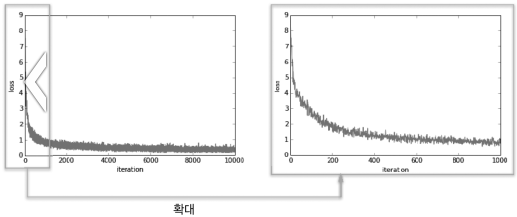

### 4.4.3 시험 데이터로 평가하기
`train_loss_list`에 저장한 값은 매 반복에서 훈련 데이터에 대한 손실 함수 값이다. 오버피팅 여부를 확인하기 위해서는 훈련 데이터에 포함되지 않은 시험 데이터를 이용해 평가해야 한다. 이를 위해 다음 구현에서는 학습 도중 정기적으로 훈련 데이터와 시험 데이터를 대상으로 정확도를 기록하는 코드를 추가해보자.  
  
참고로 에폭(epoch)은 하나의 단위를 의미하는데, 1에폭은 학습에서 훈련 데이터를 모두 소진했을 때의 횟수에 해당한다. 예를 들어, 훈련 데이터 10,000개를 100개의 미니배치로 학습하는 경우 확률적 경사 하강법을 100회 반복하면 모든 훈련 데이터를 소진하게 되므로 이 때는 100회가 1에폭이 된다. 위 에서는 코드 실행 시간을 단축하기 위해 100개의 미니배치로 훈련 데이터 60,000개를 학습하기 때문에 600회가 1에폭이라고 할 수 있다.

In [ ]:
from dataset.mnist import load_mnist
from tqdm import tqdm

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

# hyper-parameters
iter_num = 100   # 반복횟수
train_size = x_train.shape[0]
batch_size = 10  # 미니배치 크기
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

train_loss_list = []
train_acc_list = []  # 훈련 데이터에 대한 정확도 추가
test_acc_list = []   # 시험 데이터에 대한 정확도 추가

iter_per_epoch = max(train_size / batch_size, 1)  # 1에폭당 반복 수

for i in tqdm(range(iter_num)):
    # 미니배치 추출
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    
    # 매개변수 업데이트
    for key in ('W1','b1','W2','b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epochoch == 0:   # 1 에폭에 도달한 경우(600번째마다)
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc: {}, {}".format(train_acc, test_acc))

위 코드 결과를 그래프로 나타내면 다음과 같다.  

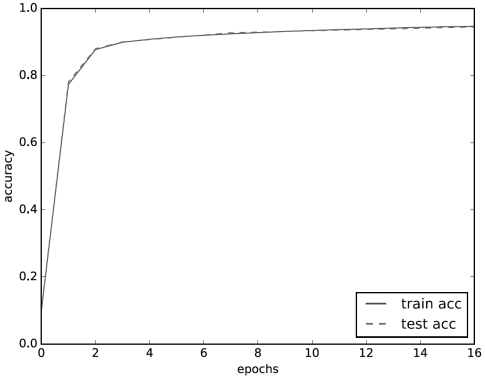  
  
train, test 정확도가 모두 좋아지고 있으며 차이가 없다. 따라서, 이번 학습에서는 오버피팅이 일어나지 않았다. 여기서 만약 오버피팅이 발생한다면, 조기 종료(early stopping) 방법을 이용해 예방할 수 있는데 이는 추후에 다루기로 한다.  
　  
## 4.6 정리
이번 장에서는 신경망의 학습에 대해 살펴봤다. 이를 위해 손실 함수라는 지표에 대해서도 공부했으며 이를 최소화하는 점을 찾기 위한 경사법도 살펴보았다.
- 신경망 학습은 손실 함수를 지표로, 손실 함수의 값이 작아지는 방향으로 매개변수를 갱신한다.
- 매개변수를 갱신할 때는 매개변수의 기울기를 이용하며 이러한 방법을 경사법이라고 한다.
- 아주 작은 값을 주었을 때의 차분으로 미분하는 것을 수치 미분이라고 하며 구현이 쉽지만 계산이 오래 걸린다.
- 수치 미분 대신 다음 장에서의 오차역전파법을 사용하면 계산이 매우 빨라진다.